### <center>Анализ данных по клиентам
### <center>с целью найти зависимости и предотвратить
### <center>отток клиентов в банке

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### <center>*9.1. Каково соотношение ушедших и лояльных клиентов?*

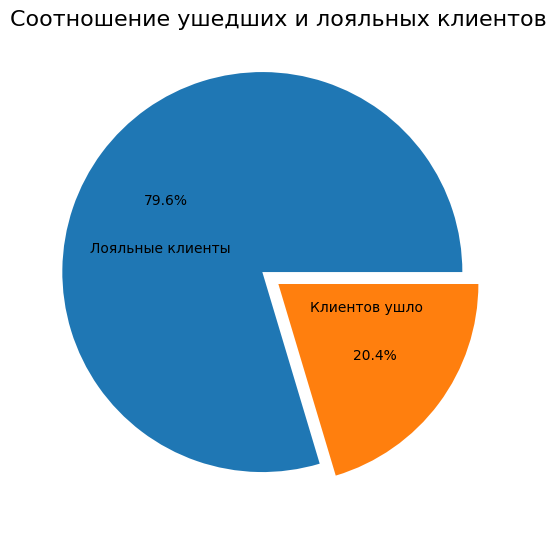

In [3]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes((0, 0, 1, 1))
ratio_exited = churn_data['Exited'].value_counts()
pie = ax.pie(
    ratio_exited,
    labels=['Лояльные клиенты', 'Клиентов ушло'],
    autopct='%.1f%%',
    labeldistance=0.2,
    explode=[0.1, 0]
)
title = ax.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16)
plt.show(pie)

*Вывод:* Ушедших клиентов в 4 раза меньше лояльных.

##### <center>*9.2 Распределение баланса пользователей, у которых на счету больше 2 500 долларов*

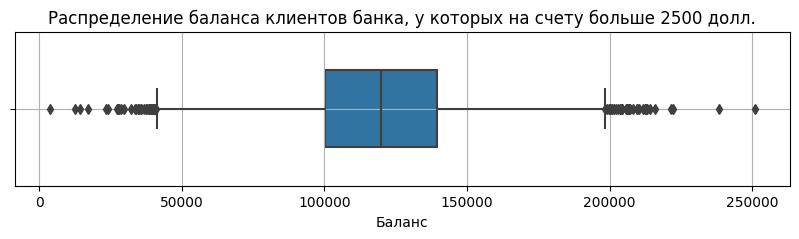

In [4]:
fig = plt.figure(figsize=(10, 2))
boxplot = sns.boxplot(
    data=churn_data[churn_data['Balance']>2500],
    x='Balance',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение баланса клиентов банка, у которых на счету больше 2500 долл.');
boxplot.set_xlabel('Баланс');
boxplot.grid()

*Вывод:*
1. На графике виден диапозон распределения баланса от 2 500 долл. до 250 000 долл.(максимальное значение баланса пользователей).
2. Большинство клиентов банка имеет баланс от 100 000 долл. до 140 000 долл. Средний баланс составляет 125000 долл.

##### <center>*9.3. Распределение баланса клиента в разрезе признака оттока.* <br>
*Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?*

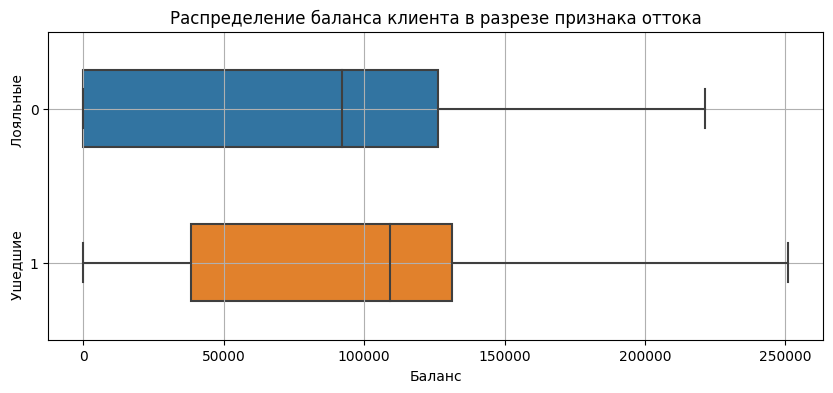

In [5]:
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение баланса клиента в разрезе признака оттока');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Ушедшие                   Лояльные');
boxplot.grid()

*Выводы:* у ушедших клиентов межквартильный размах начинается с больших сумм, чем у лояльных (примерно с 40 000 долл.), и максимум больше (130 000 долл.) Медианное значение у ушедших клиентов больше, чем у лояльных.
Можно предположить, что у банка нет льготных или особых условий для VIP-клиентов с большими суммами на накопительных счетах.
Межквартильный размах лояльных пользователей начинается с нуля, то есть у банка много пользователей с небольшими суммами на счетах.

##### <center>*9.4. Распределение возраста в разрезе признака оттока.* <br>
*В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?*

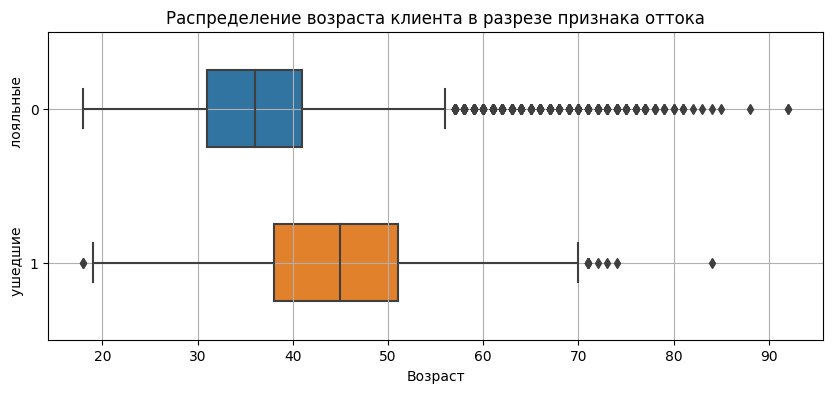

In [6]:
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение возраста клиента в разрезе признака оттока');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('ушедшие                  лояльные');
boxplot.grid()

*Выводы:* <br> потенциальных выбросов больше у лояльных клиентов, после максимума в 55 лет.
Стоит обратить внимание, что основное количество лояльных клиентов в возрасте 30-40 лет . В то время как ушедшие клиенты старше (в основной массе), это 38-50 лет. Так же медианное значение лояльных клиентов (35) на 10 лет моложе, чем медианное значение возраста ушедших (45).
Нужно обратить внимание на группу клиентов возраста 40 и старше.

##### <center>*9.5. График, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.*<br>
Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками?*

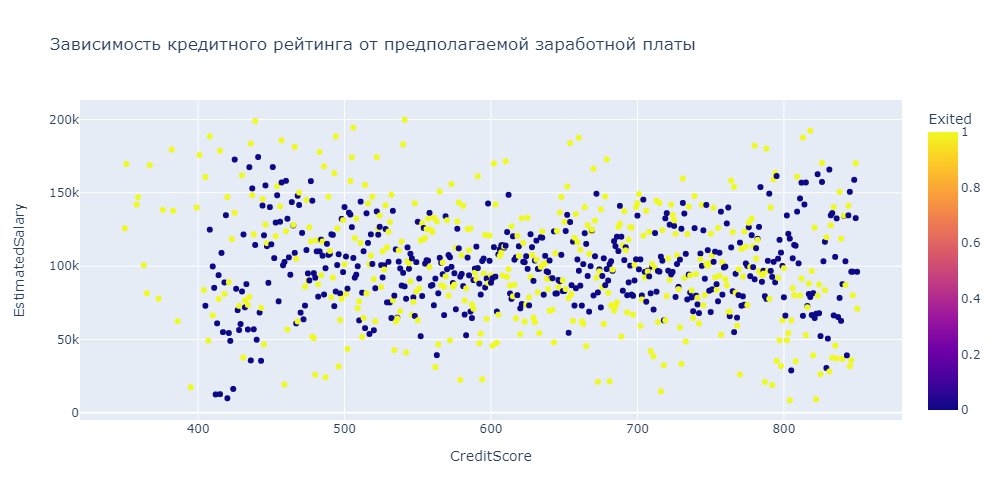

In [7]:
score_salary = churn_data.groupby(['CreditScore', 'Exited'],as_index=False)['EstimatedSalary'].median()
churn_data['Exited'] = churn_data['Exited'].astype('category')
churn_data['Exited'] = churn_data['Exited'].cat.rename_categories({
    1: 'Exited',
    0: 'Loyal'
})
fig = px.scatter(
    data_frame=score_salary,
    x='CreditScore',
    y='EstimatedSalary',
    color='Exited',
    width=1000,
    height=500,
    title='Зависимость кредитного рейтинга от предполагаемой заработной платы'
)
fig.show('png')

*Вывод:* <br> по графику без группировки не видно взаимосвязи рейтинга и зарплаты.<br>
Группировка по рейтингу и средняя заработная плата дают возможность увидеть, что у лояльных клиентов разброс средних заработных плат не такой сильных, как у ушедших. Так же видно, что среди ушедших клиентов много клиентов с большой зароботной платой, но маленьким кредитным рейтингом.

##### <center>*9.6. Кто чаще уходит, мужчины или женщины?*

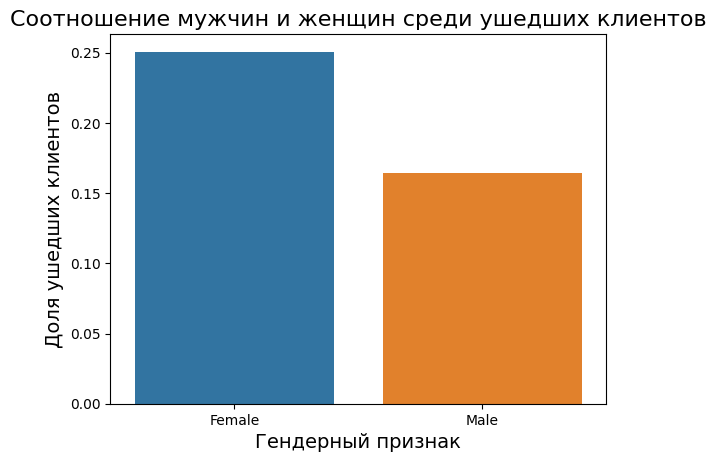

In [8]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')

churn_data = churn_data.drop(['RowNumber'], axis=1)

import seaborn as sns

churn_data_gender = churn_data.groupby(['Gender'], as_index=False)['Exited'].mean()

barplot = sns.barplot(
    data=churn_data_gender,
    x='Gender',
    y='Exited',
    orient='v',
)
barplot.set_title('Соотношение мужчин и женщин среди ушедших клиентов', fontsize=16);
barplot.set_ylabel('Доля ушедших клиентов', fontsize=14);
barplot.set_xlabel('Гендерный признак', fontsize=14);

*Вывод:* <br> чаще уходят женщины.

##### <center>*9.7. Как отток клиентов зависит от числа приобретённых у банка услуг?*

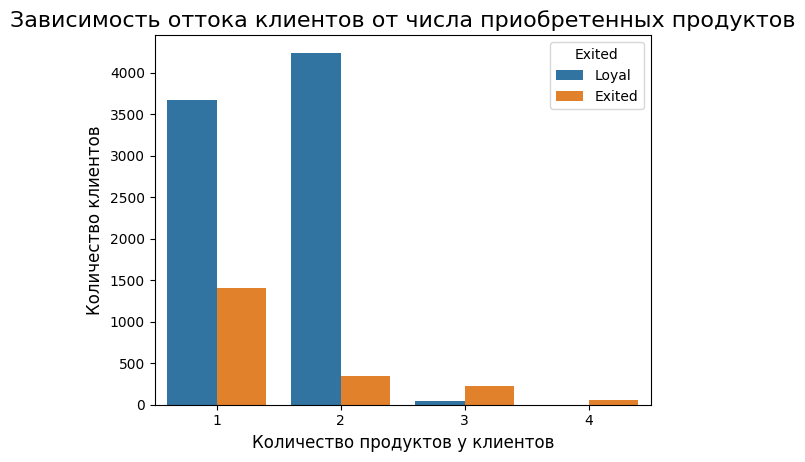

In [9]:
churn_data['Exited'] = churn_data['Exited'].astype('category')
churn_data['Exited'] = churn_data['Exited'].cat.rename_categories({
    1 : 'Exited',
    0 : 'Loyal'
})

product_exited = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False)['CustomerId'].count()

barplot = sns.barplot(
    data=product_exited,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited',
    orient='v'
)
barplot.set_title('Зависимость оттока клиентов от числа приобретенных продуктов', fontsize=16)
barplot.set_xlabel('Количество продуктов у клиентов', fontsize=12);
barplot.set_ylabel('Количество клиентов', fontsize=12);

*Выводы:* <br> Почти все лояльные клиенты пользуются продуктами 1 и 2, по этим категориям ушедших в категории 1 примерно 40%, а в категории 2 только 12,5 %.
Интересная картина у 3 и 4 категорий продуктов. В услугах 3: ушедших клиентов значитально больше, чем лояльных.
А 4ой категорией продуктов лояльные клиенты не пользуются вообще, в данной категории только ушедшие клиенты.
Соответственно, стоит обратить внимание на продукты 3 и 4. А так же на удержание клиентов в категории продукта 1.

##### <center>*9.8. Как влияет наличие статуса активного клиента на отток клиентов?* 
Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

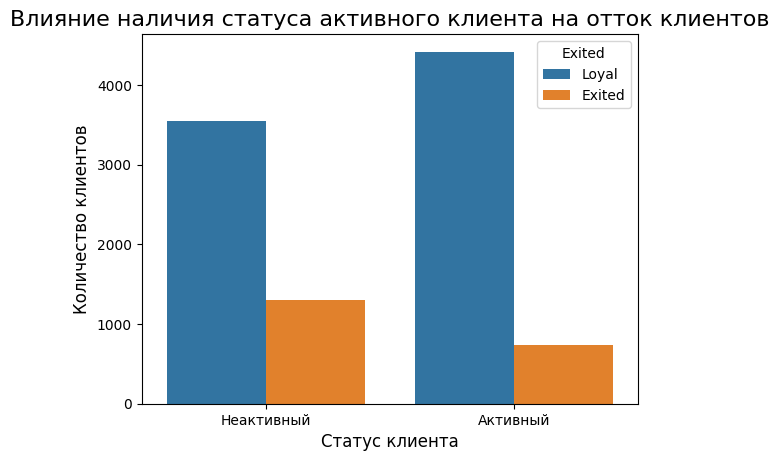

In [10]:
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('category')
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].cat.rename_categories({
    1 : 'Активный',
    0 : 'Неактивный'
})

active_exited = churn_data.groupby(['IsActiveMember', 'Exited'], as_index=False)['CustomerId'].count()

barplot = sns.barplot(
    data=active_exited,
    x='IsActiveMember',
    y='CustomerId',
    hue='Exited',
    orient='v'
)
barplot.set_title('Влияние наличия статуса активного клиента на отток клиентов', fontsize=16)
barplot.set_xlabel('Статус клиента', fontsize=12);
barplot.set_ylabel('Количество клиентов', fontsize=12);

*Выводы:* <br>по диаграмме видно, что среди клиетов со статусом активного клиента меньше отток. Соотношение неактивных клиентов: ушедших клиентов примерно 35%, а у клиентов со статусом активный ушедших примерно 18%.
Можно посоветовать для неативных клиентов: уменьшить или убрать годовое обслуживаниие, проводить льготные программы, повышать ставки по вкладам и депозитам, увеличивать процент кэшбека и т.д. 

##### <center>*9.9. В какой стране доля ушедших клиентов больше?*

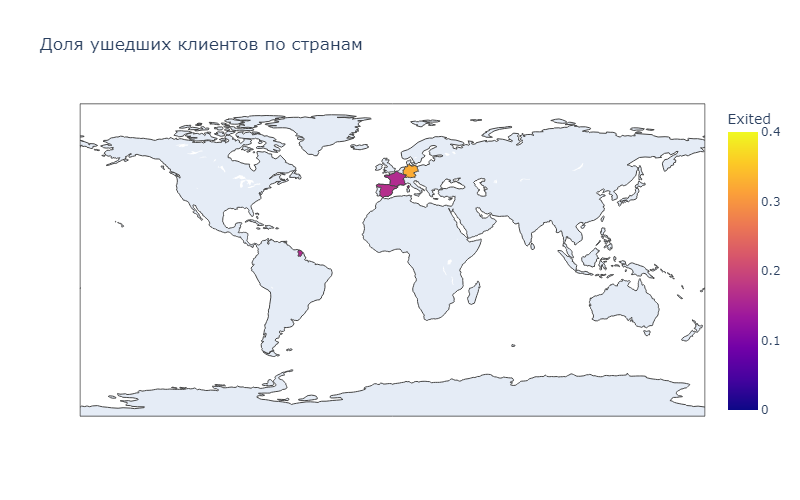

In [8]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')

churn_data = churn_data.drop(['RowNumber'], axis=1)

import plotly.express as px

churn_geo = churn_data.groupby('Geography', as_index=False)['Exited'].mean()

fig = px.choropleth(
    data_frame=churn_geo,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    range_color=[0, 0.4],
    title='Доля ушедших клиентов по странам',
    width=800, #ширина
    height=500, #высота
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.show('png')

*Вывод:*<br> По графику видно, что в Германии отток клиентов выше в 2 раза, а в Испании и Франции отток клиентов примерно одинаков. Может быть это связано с большим количеством различных банков в Германии, что дает возможность большого выбора клиентам банков.

##### <center>*9.10. Тепловая карта с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.*

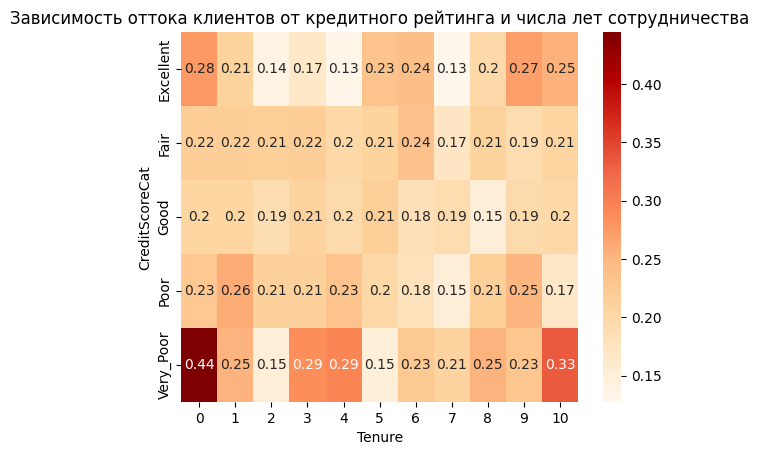

In [9]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot1=churn_data.pivot_table(
values='Exited',
index='CreditScoreCat',
columns='Tenure',
aggfunc='mean')

fig = plt.figure()
ax = sns.heatmap(data=pivot1, annot=True, cmap='OrRd');
ax.set_title('Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества');

*Вывод:* <br>
самый большой отток клиентов с кредитным рейтингом Very_Poor, которые пользуются услугами банка меньше года и 10 лет.
Так же стоит обратить внимание на клиентов рейтинга Very_Poor, которые пользуются услугами банка 3-4 года, и на клиентов с рейтингом Excellent, которые пользуются услугами первый год и 9-10 год.
